In [71]:
import numpy as np
from pydub import AudioSegment

def save_numpy_as_mp3(numpy_array, sample_rate, file_name):
    """
    Save a numpy array as an MP3 file.

    :param numpy_array: Numpy array containing audio data.
    :param sample_rate: Sample rate of the audio data.
    :param file_name: File name to save the audio to (including the '.mp3' extension).
    """
    # Ensure that the numpy array is in int16 format
    numpy_array = np.int32(numpy_array)

    # Create an audio segment
    audio_segment = AudioSegment(
        numpy_array.tobytes(), 
        frame_rate=sample_rate,
        sample_width=numpy_array.dtype.itemsize, 
        channels=1
    )

    # Export to MP3
    audio_segment.export(file_name, format='mp3')

# Example usage:


In [72]:
audio = np.load("holder/spec_to_wave.npy")[0,:]
ground  = np.load("holder/waveform.npy")

print(audio.shape)
print(ground.shape)

save_numpy_as_mp3(audio, 16000, 'audio.mp3')
save_numpy_as_mp3(ground, 16000, 'ground.mp3')

(120576,)
(120431,)


In [73]:
import matplotlib.pyplot as plt
import numpy as np
import librosa.display
def visualize_waveform(signal, sample_rate, subplot):
    plt.subplot(subplot)
    librosa.display.waveshow(signal, sr=sample_rate)
    if subplot == 221:
        plt.title('Ground Truth')
    else:
        plt.title('From Procesor to Hifi')

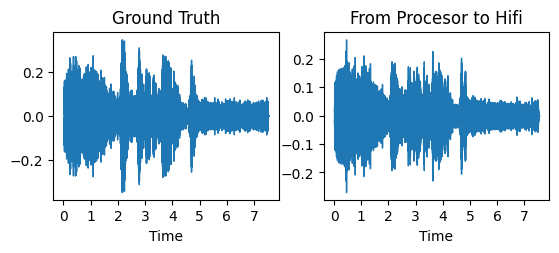

In [74]:
visualize_waveform(ground, 16000, 221)
visualize_waveform(audio, 16000, 222)

In [75]:
from IPython.display import Audio

# Assuming you have a numpy array called 'audio'
save_numpy_as_mp3(audio, 16000, 'holder/audio/audio.mp3')
Audio(audio, rate=16000)


In [70]:
save_numpy_as_mp3(ground, 16000, 'holder/audio/ground.mp3')
Audio(ground, rate=16000)


In [64]:
from torch.nn.functional import l1_loss, mse_loss
import torch
min_size = min(len(audio), len(ground))
print(l1_loss(torch.tensor(audio[:min_size]), torch.tensor(ground)))
print(mse_loss(torch.tensor(audio[:min_size]), torch.tensor(ground)))


tensor(0.0417)
tensor(0.0035)


In [45]:
import librosa

audio = librosa.load("holder/audio/audio.mp3", sr=16000)[0]  
ground = librosa.load("holder/audio/ground.mp3", sr=16000)[0]  

In [46]:
Audio(audio, rate=16000)


In [47]:
Audio(ground, rate=16000)